In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [3]:
# Convert data type to float32 for normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize by dividing each pixel by 255 (assuming pixel values are in the range [0, 255])
X_train /= 255.0
X_test /= 255.0


In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode the labels
y_val = to_categorical(y_val, num_classes=10)

In [11]:
X_train.shape

(40000, 32, 32, 3)

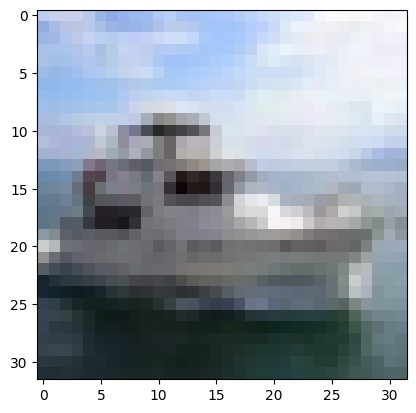

In [11]:
import matplotlib.pyplot as plt

# Select an image index (e.g., 0 for the first image)
image_index = 1

# Reshape the image to 32x32x3 (width, height, color channels)
image = X_train[39999].reshape(32, 32, 3)

plt.imshow(image)
plt.show()

In [12]:
# Define the model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD


num_classes = 10
model = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/50
313/313 [==============================] - 4s 12ms/step - loss: 2.0457 - accuracy: 0.2637 - val_loss: 1.9472 - val_accuracy: 0.2843
Epoch 2/50
313/313 [==============================] - 4s 14ms/step - loss: 1.8738 - accuracy: 0.3356 - val_loss: 1.8313 - val_accuracy: 0.3471
Epoch 3/50
313/313 [==============================] - 3s 11ms/step - loss: 1.8112 - accuracy: 0.3611 - val_loss: 1.7883 - val_accuracy: 0.3646
Epoch 4/50
313/313 [==============================] - 3s 11ms/step - loss: 1.7634 - accuracy: 0.3794 - val_loss: 1.7517 - val_accuracy: 0.3744
Epoch 5/50
313/313 [==============================] - 4s 11ms/step - loss: 1.7292 - accuracy: 0.3919 - val_loss: 1.7355 - val_accuracy: 0.3788
Epoch 6/50
313/313 [==============================] - 4s 11ms/step - loss: 1.6999 - accuracy: 0.4018 - val_loss: 1.7270 - val_accuracy: 0.3796
Epoch 7/50
313/313 [==============================] - 3s 10ms/step - loss: 1.6752 - accuracy: 0.4082 - val_loss: 1.6726 - val_accuracy: 0.4072

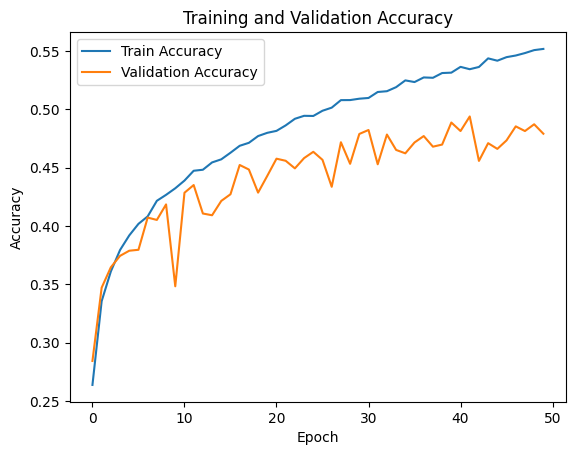

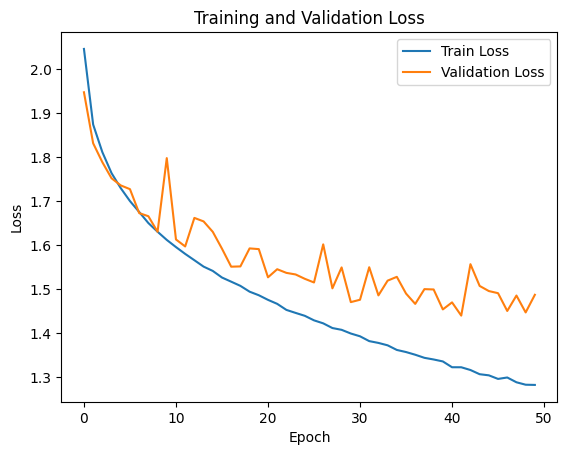

In [13]:
# Train the model using Mini-batch SGD
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
from tensorflow.keras.regularizers import l2
model_reg = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(num_classes, activation='softmax')
])

# Compile the model
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/50
313/313 [==============================] - 6s 15ms/step - loss: 2.7997 - accuracy: 0.2754 - val_loss: 2.6429 - val_accuracy: 0.3244
Epoch 2/50
313/313 [==============================] - 3s 11ms/step - loss: 2.5589 - accuracy: 0.3430 - val_loss: 2.4948 - val_accuracy: 0.3366
Epoch 3/50
313/313 [==============================] - 3s 9ms/step - loss: 2.4237 - accuracy: 0.3660 - val_loss: 2.3780 - val_accuracy: 0.3634
Epoch 4/50
313/313 [==============================] - 4s 12ms/step - loss: 2.3135 - accuracy: 0.3855 - val_loss: 2.3259 - val_accuracy: 0.3528
Epoch 5/50
313/313 [==============================] - 4s 12ms/step - loss: 2.2244 - accuracy: 0.3934 - val_loss: 2.2145 - val_accuracy: 0.3776
Epoch 6/50
313/313 [==============================] - 3s 10ms/step - loss: 2.1442 - accuracy: 0.4055 - val_loss: 2.1074 - val_accuracy: 0.4013
Epoch 7/50
313/313 [==============================] - 3s 10ms/step - loss: 2.0767 - accuracy: 0.4124 - val_loss: 2.0547 - val_accuracy: 0.4024


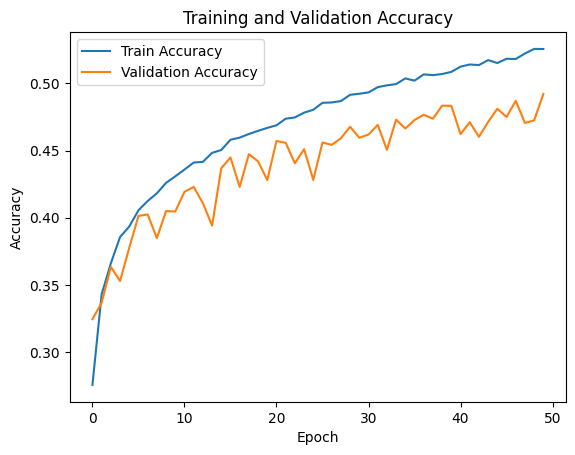

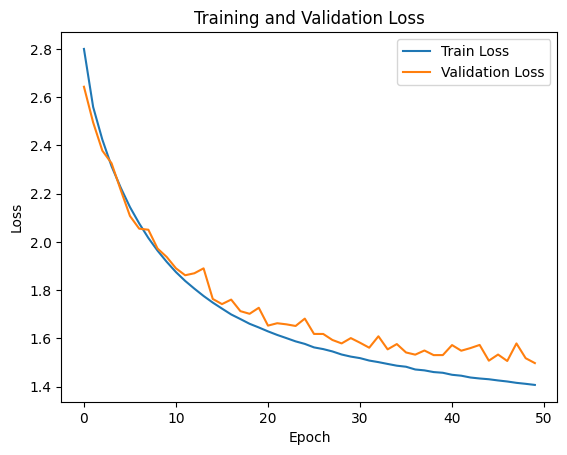

In [24]:
# Train the model using Mini-batch SGD
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
from tensorflow.keras.layers import Dropout

In [26]:
dropout_rate=0.2
model_reg = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  Dropout(dropout_rate),
  Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(num_classes, activation='softmax')
])

# Compile the model
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/50
313/313 [==============================] - 4s 11ms/step - loss: 2.9077 - accuracy: 0.2237 - val_loss: 2.7126 - val_accuracy: 0.3043
Epoch 2/50
313/313 [==============================] - 4s 11ms/step - loss: 2.6455 - accuracy: 0.3054 - val_loss: 2.5582 - val_accuracy: 0.3269
Epoch 3/50
313/313 [==============================] - 4s 13ms/step - loss: 2.4948 - accuracy: 0.3367 - val_loss: 2.4030 - val_accuracy: 0.3564
Epoch 4/50
313/313 [==============================] - 3s 10ms/step - loss: 2.3806 - accuracy: 0.3547 - val_loss: 2.3026 - val_accuracy: 0.3668
Epoch 5/50
313/313 [==============================] - 3s 11ms/step - loss: 2.2868 - accuracy: 0.3686 - val_loss: 2.2265 - val_accuracy: 0.3686
Epoch 6/50
313/313 [==============================] - 4s 13ms/step - loss: 2.2086 - accuracy: 0.3758 - val_loss: 2.1471 - val_accuracy: 0.3898
Epoch 7/50
313/313 [==============================] - 3s 11ms/step - loss: 2.1380 - accuracy: 0.3838 - val_loss: 2.0864 - val_accuracy: 0.3939

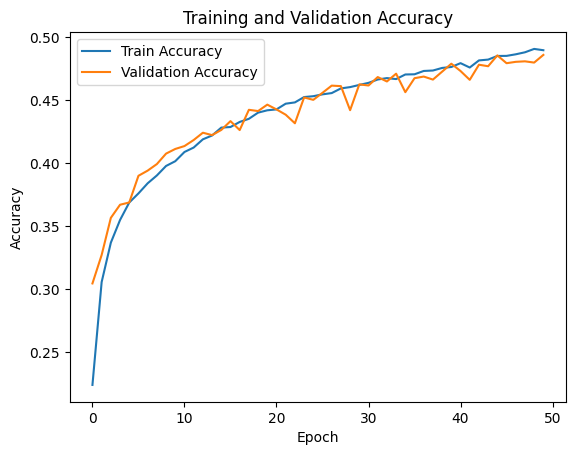

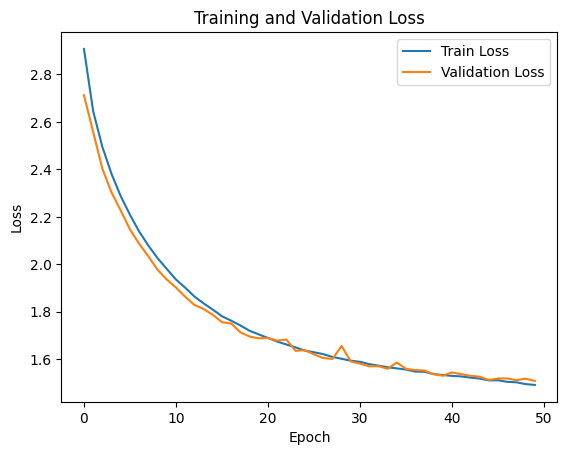

In [27]:
# Train the model using Mini-batch SGD
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
dropout_rate=0.3
model_reg = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  Dropout(dropout_rate),
  Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(num_classes, activation='softmax')
])

# Compile the model
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/50
313/313 [==============================] - 4s 11ms/step - loss: 2.9255 - accuracy: 0.2272 - val_loss: 2.7429 - val_accuracy: 0.2957
Epoch 2/50
313/313 [==============================] - 4s 14ms/step - loss: 2.6783 - accuracy: 0.2920 - val_loss: 2.5601 - val_accuracy: 0.3291
Epoch 3/50
313/313 [==============================] - 6s 19ms/step - loss: 2.5364 - accuracy: 0.3178 - val_loss: 2.4383 - val_accuracy: 0.3438
Epoch 4/50
313/313 [==============================] - 6s 18ms/step - loss: 2.4192 - accuracy: 0.3419 - val_loss: 2.3418 - val_accuracy: 0.3523
Epoch 5/50
313/313 [==============================] - 8s 24ms/step - loss: 2.3213 - accuracy: 0.3530 - val_loss: 2.2515 - val_accuracy: 0.3695
Epoch 6/50
313/313 [==============================] - 6s 20ms/step - loss: 2.2417 - accuracy: 0.3611 - val_loss: 2.1683 - val_accuracy: 0.3823
Epoch 7/50
313/313 [==============================] - 4s 14ms/step - loss: 2.1748 - accuracy: 0.3686 - val_loss: 2.0976 - val_accuracy: 0.3841

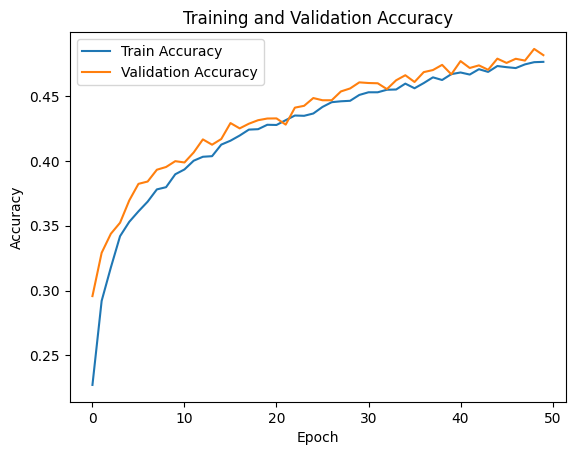

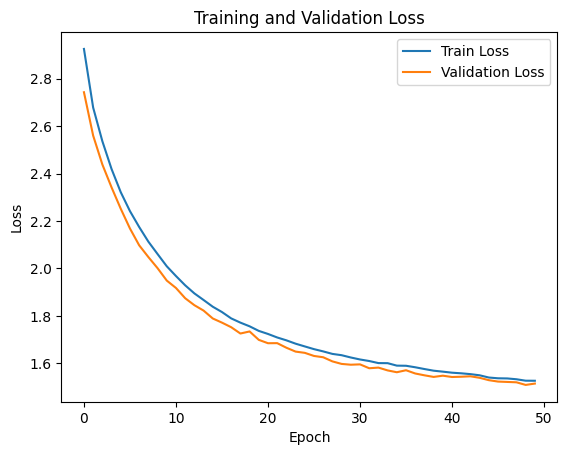

In [29]:
# Train the model using Mini-batch SGD
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
dropout_rate=0.5
model_reg = Sequential([
  Flatten(input_shape=(32, 32, 3)),  # Input shape for CIFAR-10 images
  Dense(128, activation='relu'),
  Dropout(dropout_rate),
  Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(num_classes, activation='softmax')
])

# Compile the model
model_reg.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/50
313/313 [==============================] - 4s 12ms/step - loss: 2.9961 - accuracy: 0.1863 - val_loss: 2.8023 - val_accuracy: 0.2831
Epoch 2/50
313/313 [==============================] - 3s 10ms/step - loss: 2.7695 - accuracy: 0.2445 - val_loss: 2.6253 - val_accuracy: 0.3074
Epoch 3/50
313/313 [==============================] - 4s 12ms/step - loss: 2.6166 - accuracy: 0.2822 - val_loss: 2.4853 - val_accuracy: 0.3334
Epoch 4/50
313/313 [==============================] - 4s 12ms/step - loss: 2.5028 - accuracy: 0.3011 - val_loss: 2.3857 - val_accuracy: 0.3459
Epoch 5/50
313/313 [==============================] - 3s 11ms/step - loss: 2.4045 - accuracy: 0.3168 - val_loss: 2.3028 - val_accuracy: 0.3593
Epoch 6/50
313/313 [==============================] - 3s 10ms/step - loss: 2.3230 - accuracy: 0.3289 - val_loss: 2.2133 - val_accuracy: 0.3679
Epoch 7/50
313/313 [==============================] - 4s 13ms/step - loss: 2.2489 - accuracy: 0.3398 - val_loss: 2.1564 - val_accuracy: 0.3725

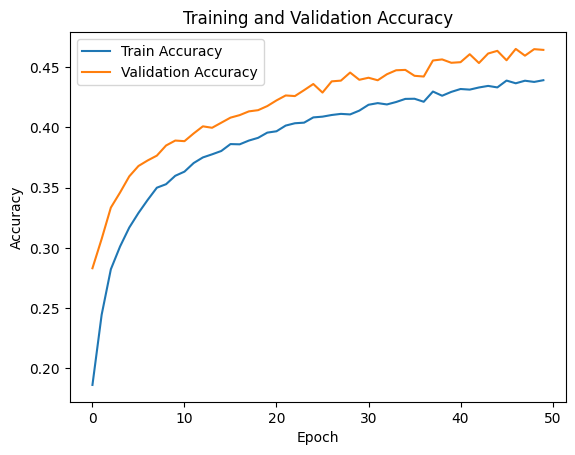

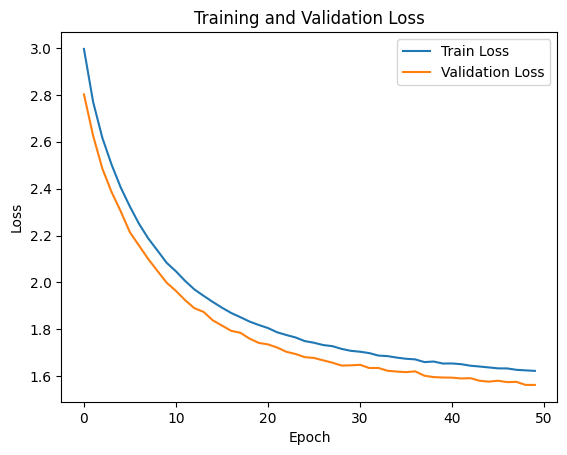

In [31]:
# Train the model using Mini-batch SGD
history = model_reg.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))

# Plot learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()